# Visualize seed permutation

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

In [2]:
summary_path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/seed_permutation_mqc.tsv")
detail_paths = glob(os.path.join(PIPELINE_RUN_DIR, "main/results/evaluation/seed_permutation/*/*detailed.tsv"))

In [3]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

# drop "no_tool" from the amim meta df
amim_meta_df = amim_meta_df[amim_meta_df.id != "no_tool"]

# summaries per module
summary_df = pd.read_csv(summary_path, sep="\t")
summary_df[["seed_id","network_id","amim_id"]] = summary_df.id.apply(split_module_id)
summary_df["network"] = summary_df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
summary_df["amim"] = summary_df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))

# gene-level information
detail_df_list = []
for path in detail_paths:
    module_id = os.path.basename(os.path.dirname(path))     # directory name is the module id
    df = pd.read_csv(path, sep="\t")
    df[["seed_id","network_id","amim_id"]] = split_module_id(module_id)
    detail_df_list.append(df)
detail_df = pd.concat(detail_df_list, ignore_index=True)
detail_df_list = None
detail_df["network"] = detail_df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
detail_df["amim"] = detail_df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))


## Summary visualizations

### Robustness

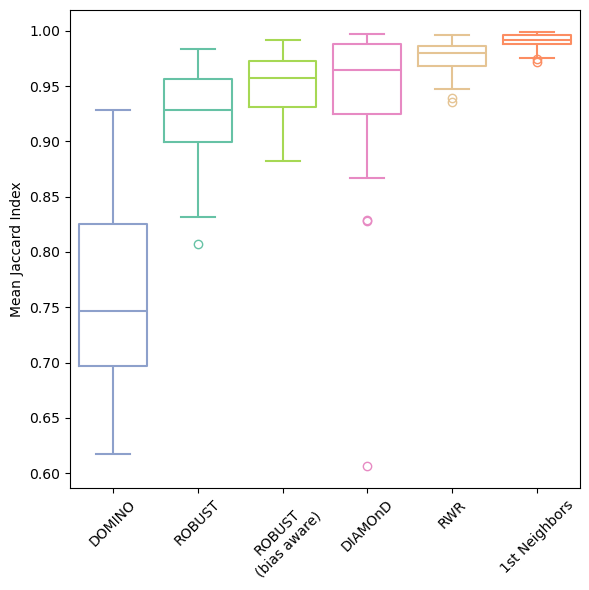

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.tight_layout()
plt.show()


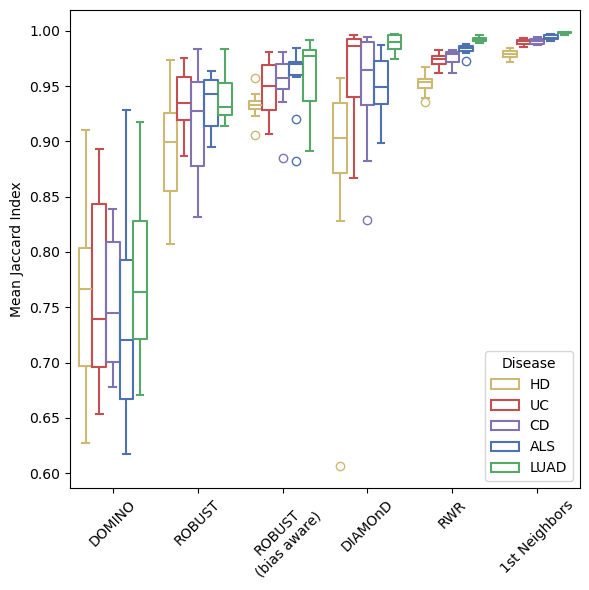

In [12]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.legend(title="Disease")
plt.tight_layout()
plt.show()

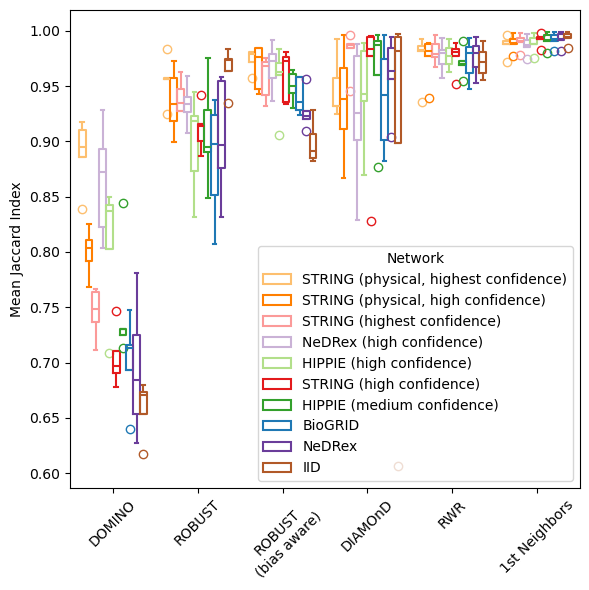

In [13]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.legend(title="Network")
plt.tight_layout()
plt.show()

### Seed rediscovery rate

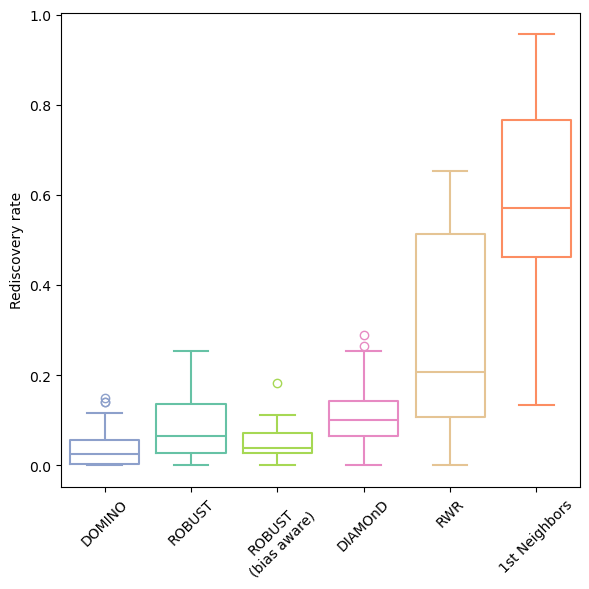

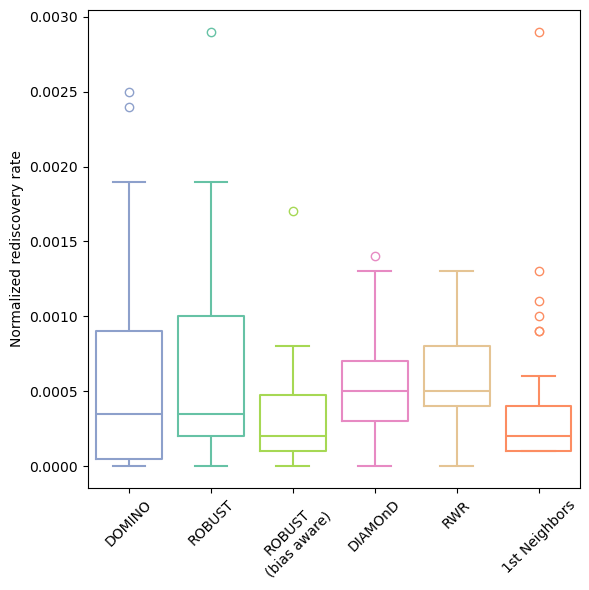

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Rediscovery rate")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Normalized rediscovery rate")
plt.tight_layout()
plt.show()

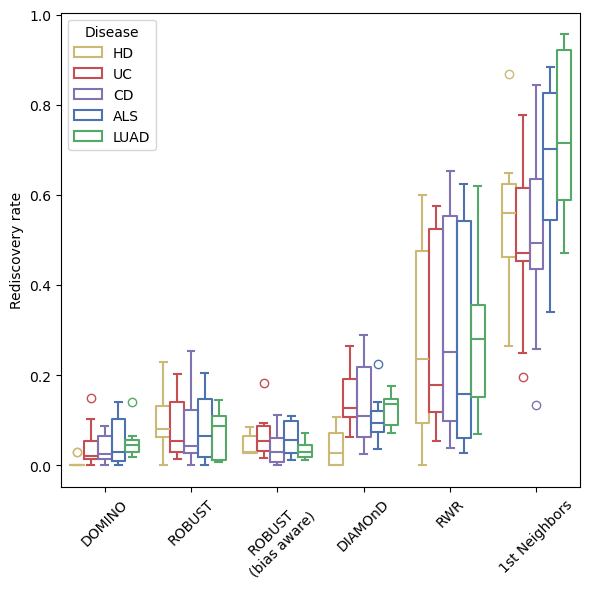

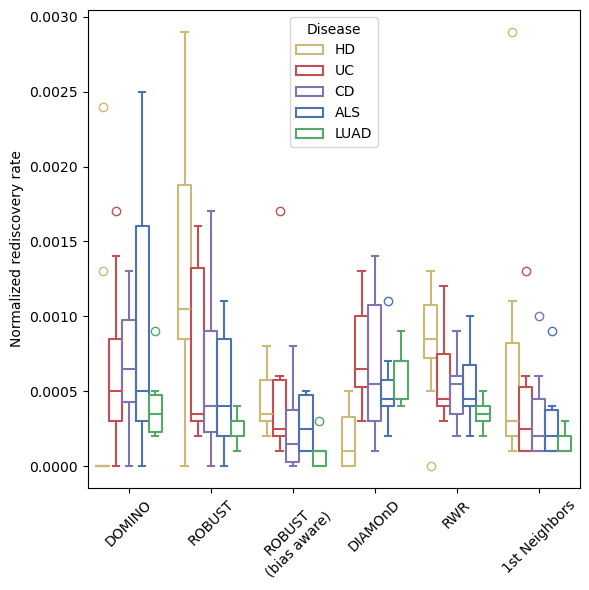

In [15]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Rediscovery rate")
plt.legend(title="Disease")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Normalized rediscovery rate")
plt.legend(title="Disease")
plt.tight_layout()
plt.show()

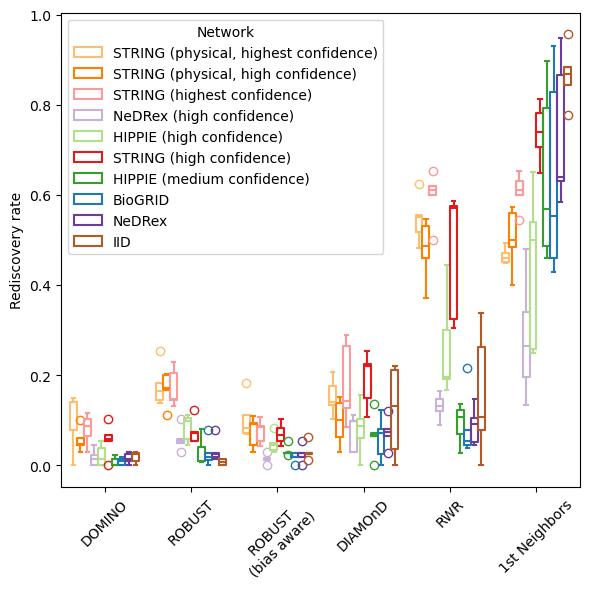

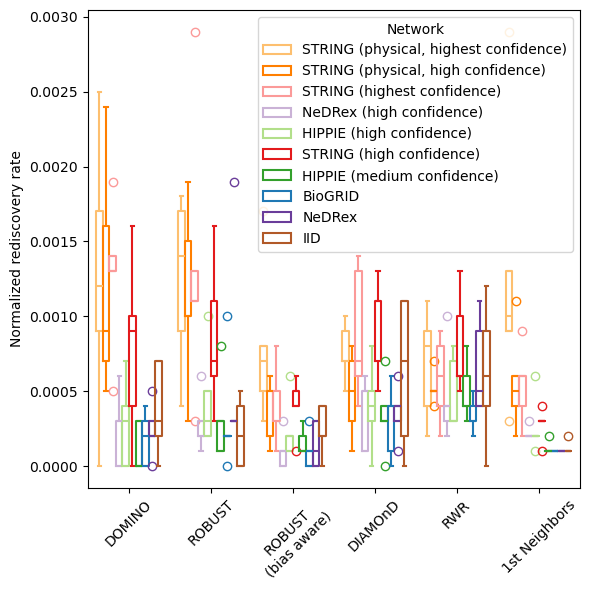

In [16]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Rediscovery rate")
plt.legend(title="Network")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Normalized rediscovery rate")
plt.legend(title="Network")
plt.tight_layout()
plt.show()

## Gene-level visualization

### Seed rediscovery rate

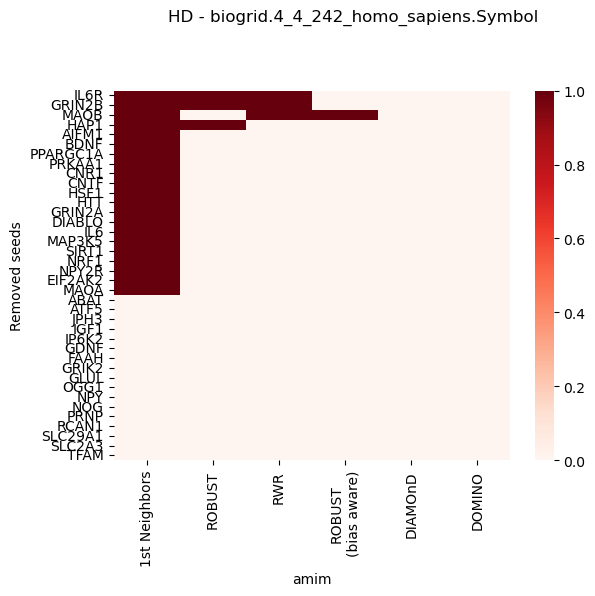

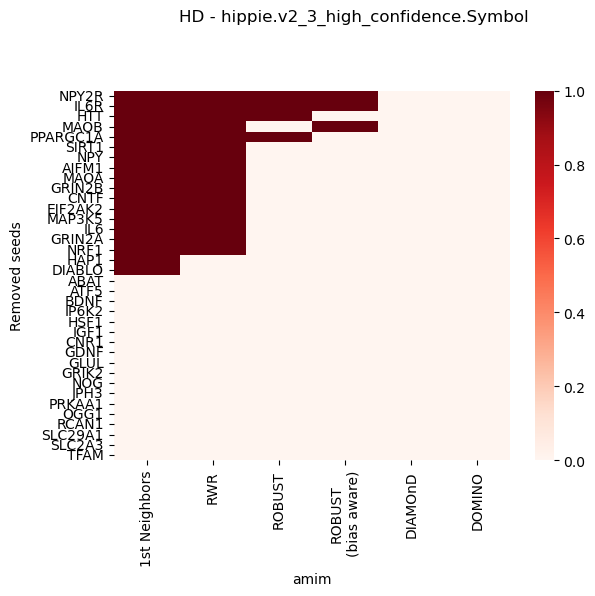

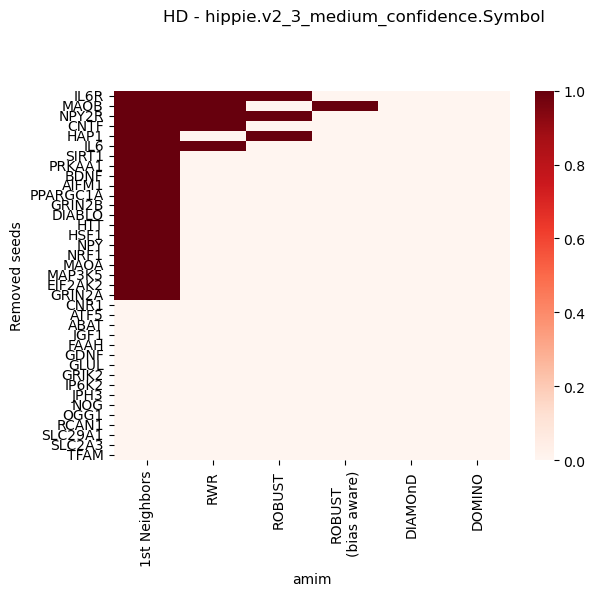

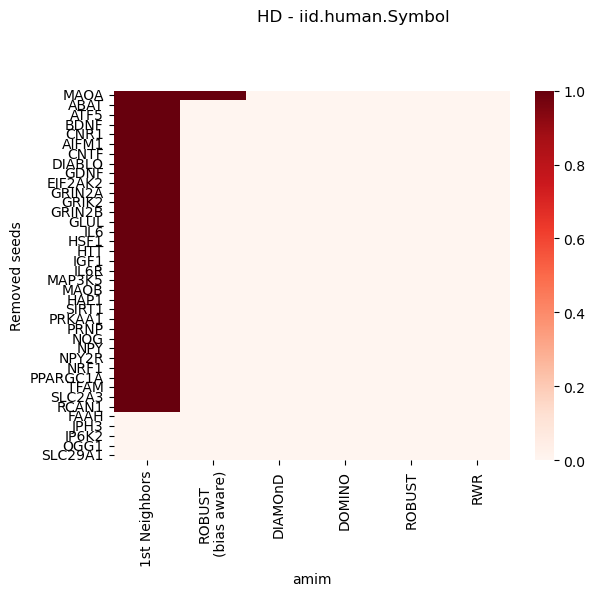

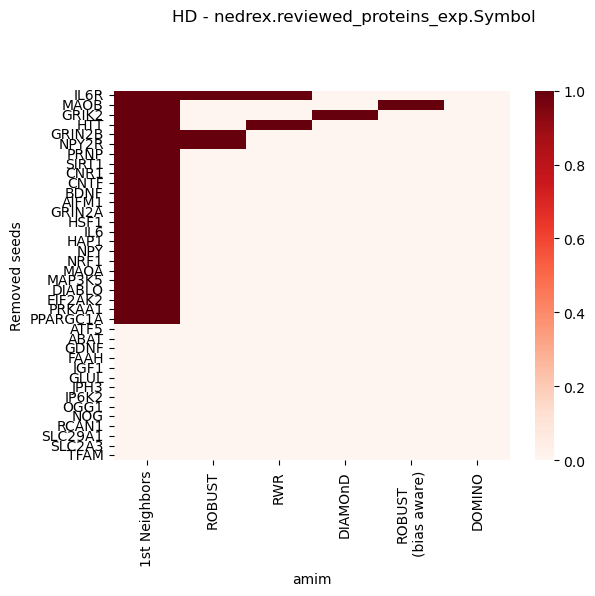

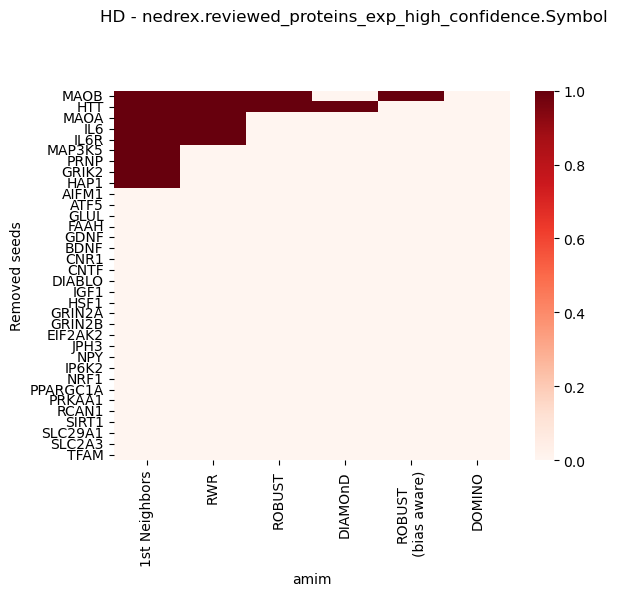

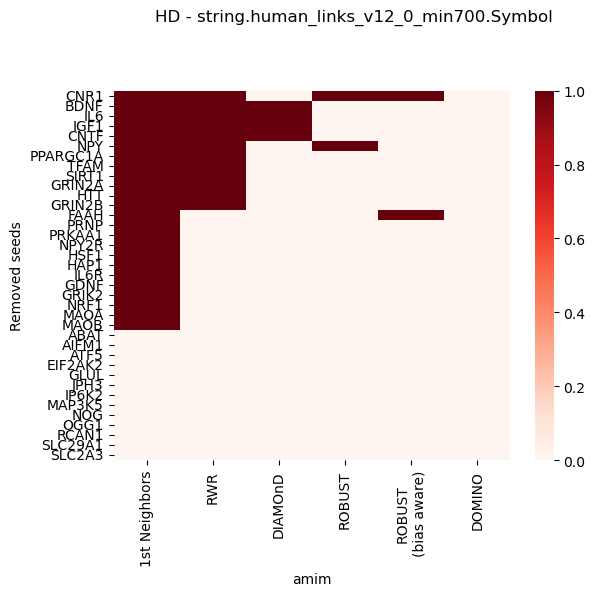

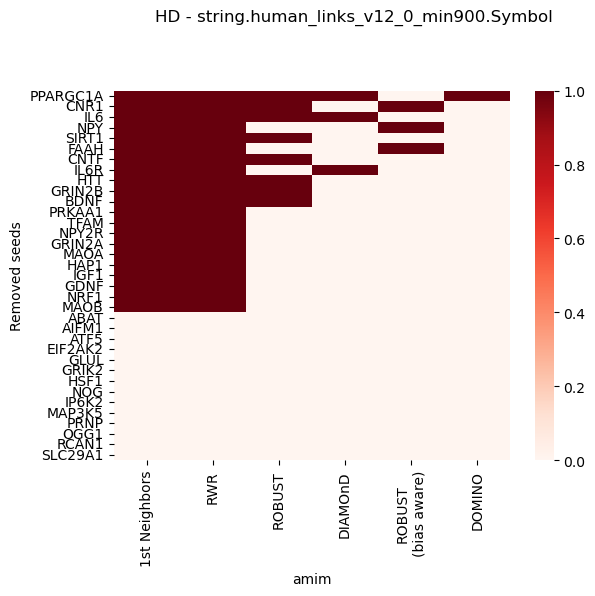

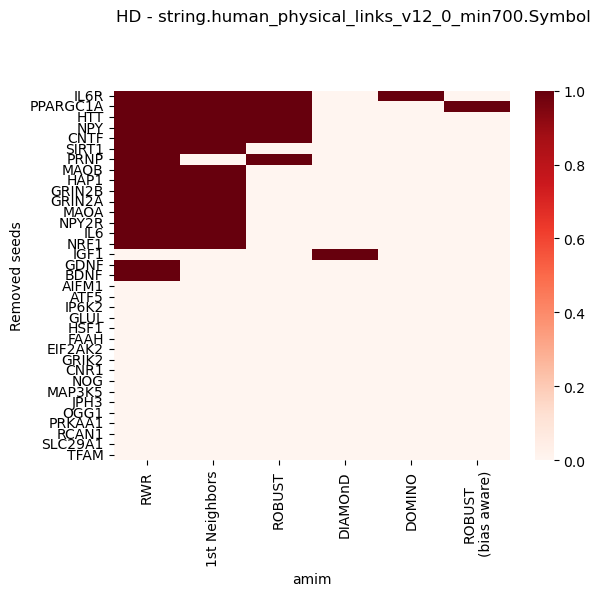

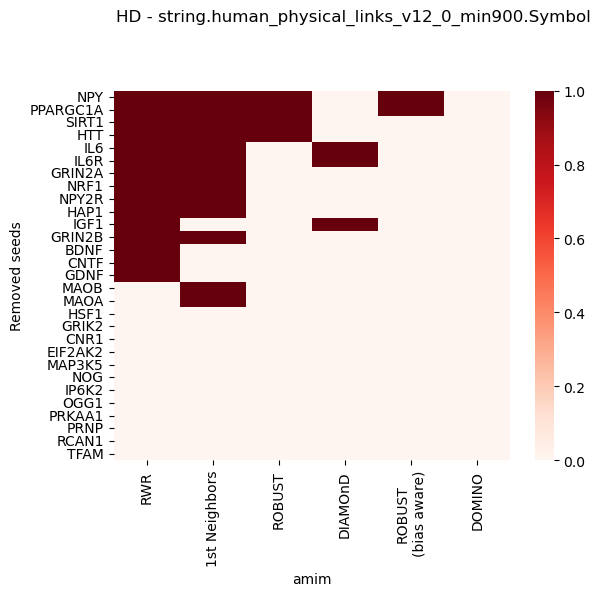

In [7]:
grouped_dfs = [(group, data) for group, data in detail_df.groupby(["seed_id","network_id"])]
# to wide format
for group in grouped_dfs:
    disease = group[0][0]
    network = group[0][1]
    df = group[1]
    if disease != "HD":
        continue
    df = df.pivot(index="Removed seeds", columns="amim", values="Retrieval frequency")
    # sort rows by sum of values
    df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]
    # sort columns by sum of values
    df = df[df.sum(axis=0).sort_values(ascending=False).index]
    title = f"{disease} - {network}"
    # add title to the heatmap
    g = sns.heatmap(df, cmap="Reds", yticklabels=True)
    g.figure.suptitle(title, y=1.05)  # y controls vertical position
    plt.show()

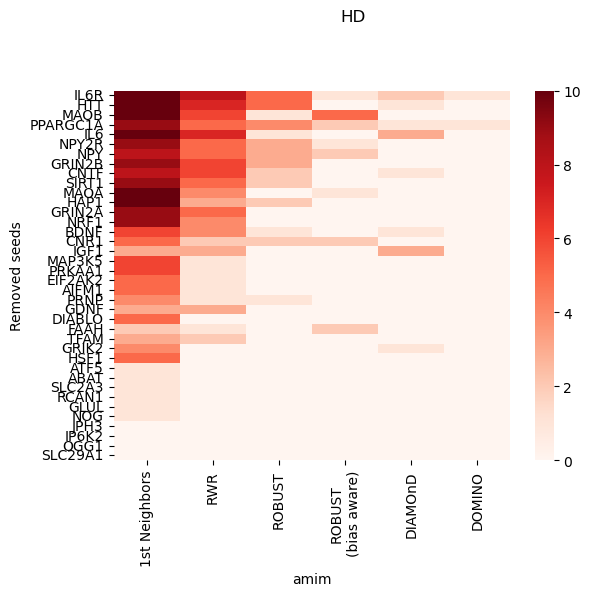

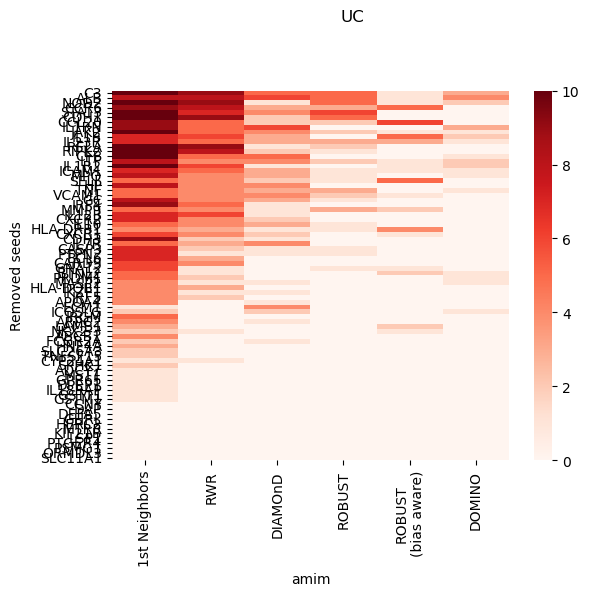

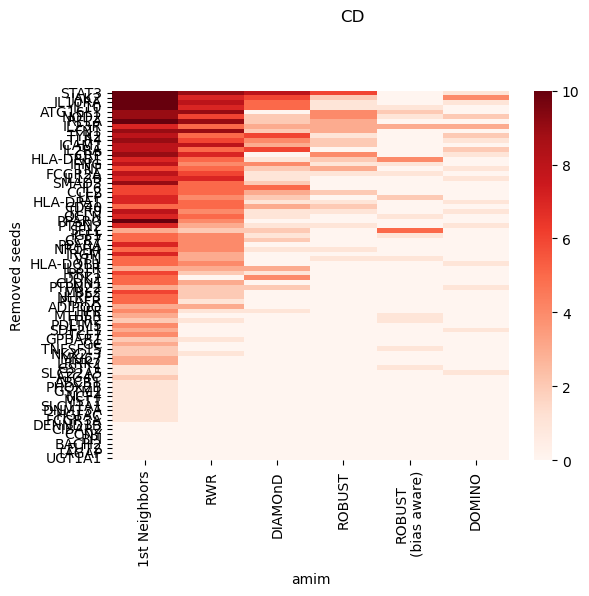

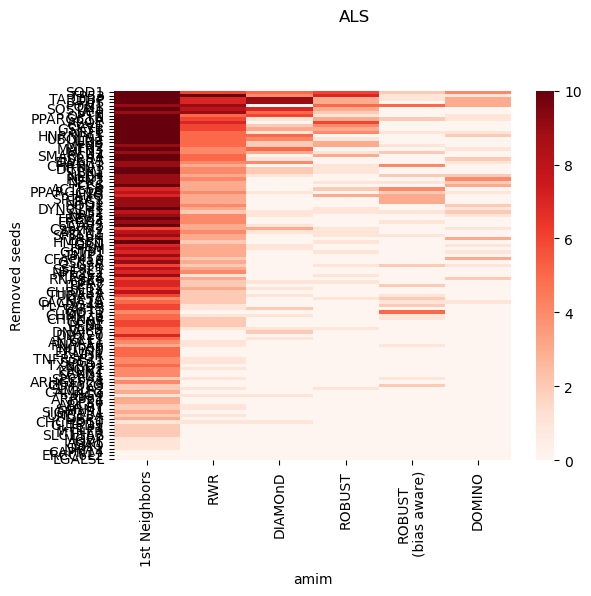

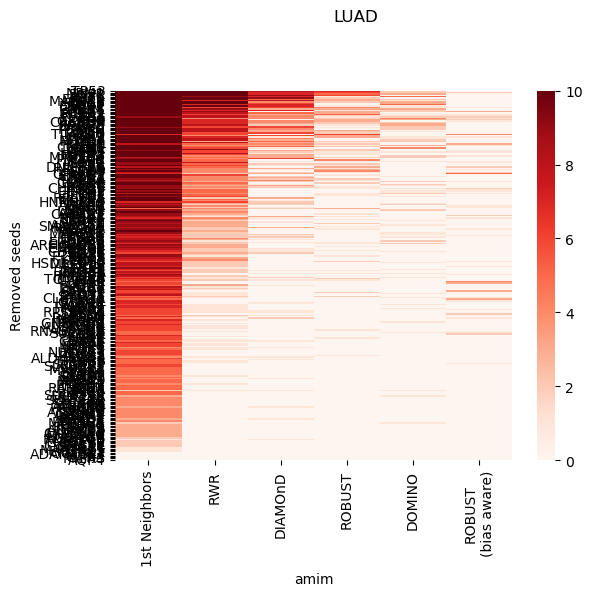

In [28]:
sum_over_networks_df = detail_df.groupby(['seed_id', 'amim', 'Removed seeds'])['Retrieval frequency'].sum().reset_index()
for disease in seed_meta_df.short:
    df = sum_over_networks_df[sum_over_networks_df.seed_id == disease]
    df = df.pivot(index="Removed seeds", columns="amim", values="Retrieval frequency")
    # sort rows by sum of values
    df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]
    # sort columns by sum of values
    df = df[df.sum(axis=0).sort_values(ascending=False).index]
    title = f"{disease}"
    # add title to the heatmap
    g = sns.heatmap(df, cmap="Reds", yticklabels=True)
    g.figure.suptitle(title, y=1.05)  # y controls vertical position
    plt.show()